# Case study Analysis


### Suicide Rates Overview 1985 to 2016

#### Data set link: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

#### Loading the libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

#### Import dataset

In [78]:
data = pd.read_csv('master.csv')

#### Check data

In [79]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


#### Check data describe

In [80]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


#### Check the columns

In [81]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

#### Checking the shape of data

In [82]:
data.shape

(27820, 12)

#### Count of Datatypes

In [83]:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [84]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

#### Check dataset information

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


#### Cheking the dataset missing values

In [86]:
total = data.isnull().sum().sort_values(ascending = False)
percent = data.isnull().mean().sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


#### Frequency table for age

In [87]:
tab = pd.crosstab(index = data['age'], columns = 'count')
tab

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


#### Bar plot to check number of suicides by top countries

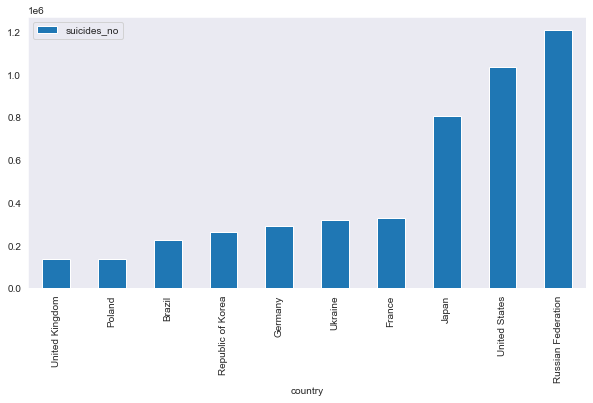

In [88]:
data.groupby(['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x = 'country', y = 'suicides_no', kind = 'bar', figsize=(10,5))
plt.show()

* Russian Federation has the highest number of suicides followed by United States and Japan


* The number of suicides in Russia, the United States and Japan is very high when compared with the figures of other countries.


#### Bar plot for number of suicides Vs Age

Text(0, 0.5, 'Age')

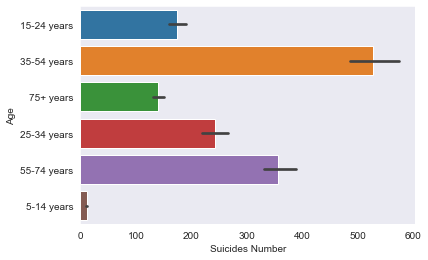

In [89]:
sns.barplot(x = 'suicides_no', y = 'age', data = data)
plt.xlabel('Suicides Number')
plt.ylabel('Age')

#### Bar plot for number of suicides Vs Sex

Text(0, 0.5, 'Suicides number')

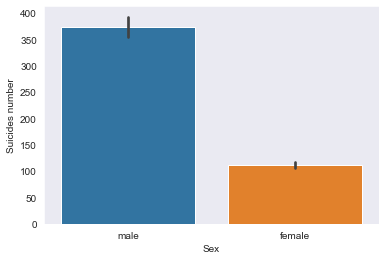

In [90]:
sns.barplot(x = 'sex', y = 'suicides_no', data = data)
plt.xlabel('Sex')
plt.ylabel('Suicides number')

#### Bar plot for number of suicides Vs generation

Text(0, 0.5, 'Suicides number')

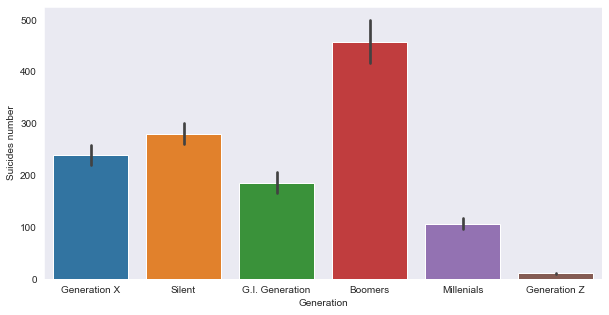

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'generation', y = 'suicides_no', data = data)
plt.xlabel('Generation')
plt.ylabel('Suicides number')

#### Scatter plot number of suicides Vs population

In [92]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

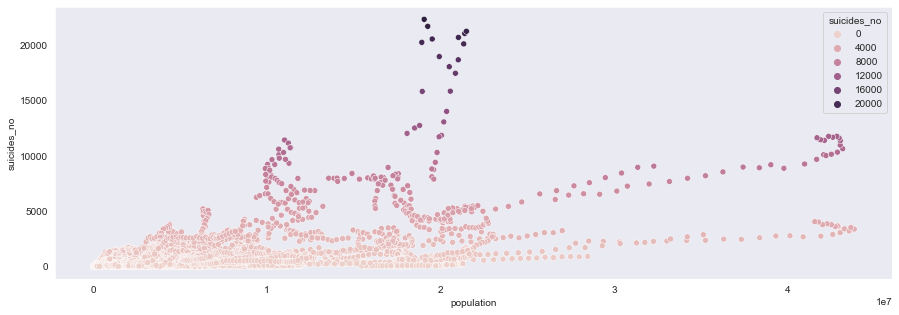

In [93]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = 'population', y = 'suicides_no', data = data, hue = 'suicides_no')

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

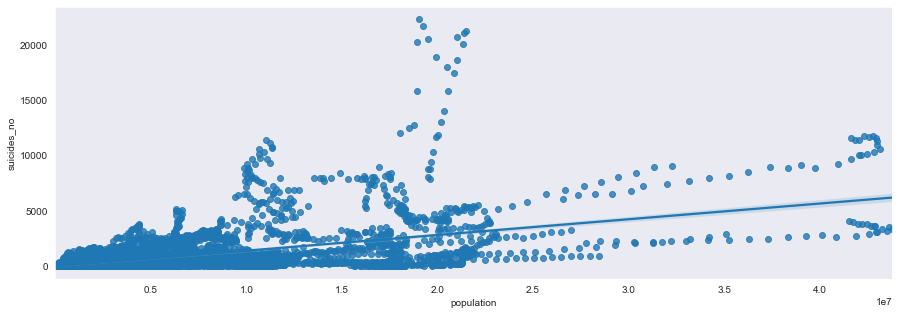

In [94]:
plt.figure(figsize=(15,5))
sns.regplot(x = 'population', y = 'suicides_no', data = data)

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

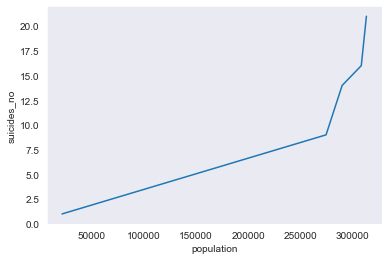

In [95]:
sns.lineplot(x = 'population', y = 'suicides_no', data = data.head() )

#### Scatter plot number of suicides/100k Population Vs GDP per capita

In [96]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides/100k pop'>

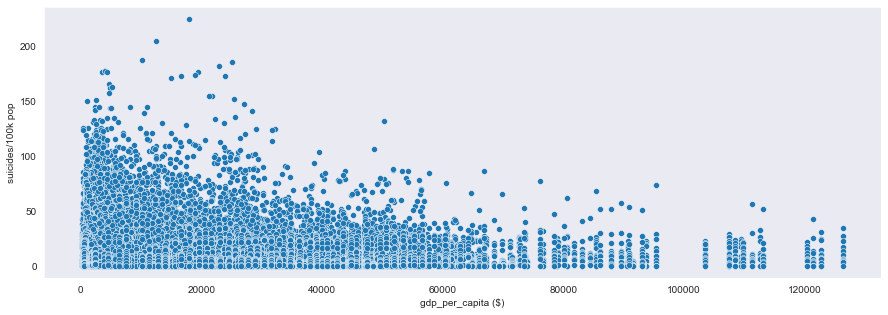

In [97]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = 'gdp_per_capita ($)', y = 'suicides/100k pop', data = data )

* higher suicide rates are a bit more prevalent in countries with lower GDP but there is no significant correlation between gdp_per_capita ($) and  suicides/100k pop

#### Correlation among pairs of continuous variables

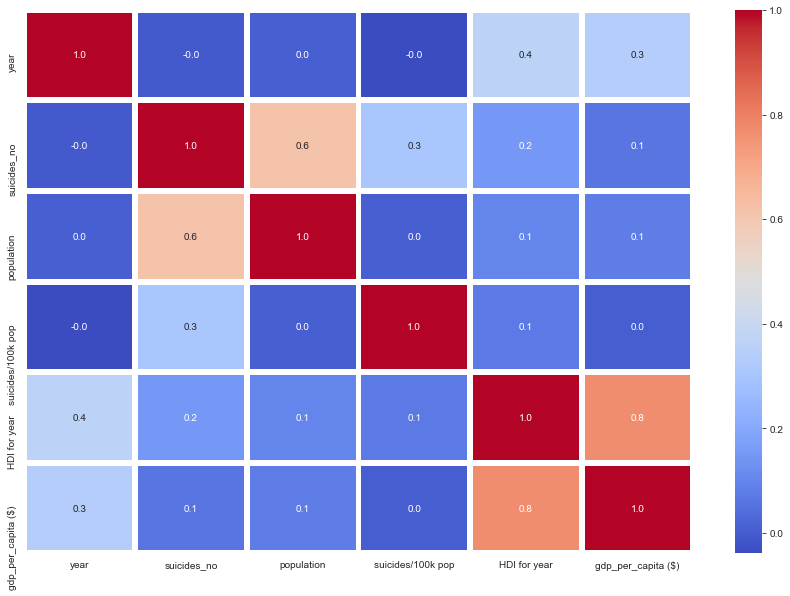

In [98]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),linewidth = 5, annot = True,fmt = '.1f', cmap='coolwarm')
plt.show()

* None of the attributes seem have correlation of real significance 
* Some obvious correlations are that in a large population. It is very likely that the number of suicides will be more
* Human development index (HDI) and gdp is the only pair with a high correlation

#### Bar plot Number of suicides by sex and age

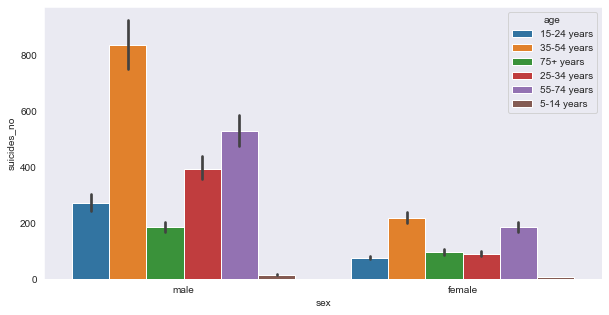

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'sex', y = 'suicides_no', data = data, hue = 'age')
plt.show()

#### Bar plot Number of suicides by sex and generation

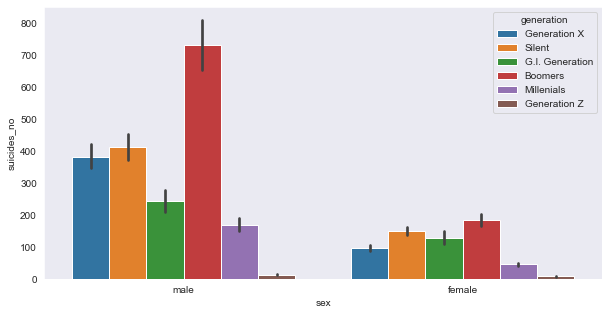

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'sex', y = 'suicides_no', data = data, hue = 'generation')
plt.show()

* Suicides in males apart from being higher, has a slight variation in distribution across generations compared to the suicides of females across generation.
* In case of males, generation X has higher suicide numbers compared to G.I Generation but incase of females, it is opposite.

#### Checking number of suicides: Country Vs Sex

In [101]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_index(by = 'suicides_no', ascending = False)
most_cont_m = suic_sum_m.head(10)

TypeError: sort_index() got an unexpected keyword argument 'by'

#### Average number of suicides across each generation for a given gender along with the confidence intervals with a point plot

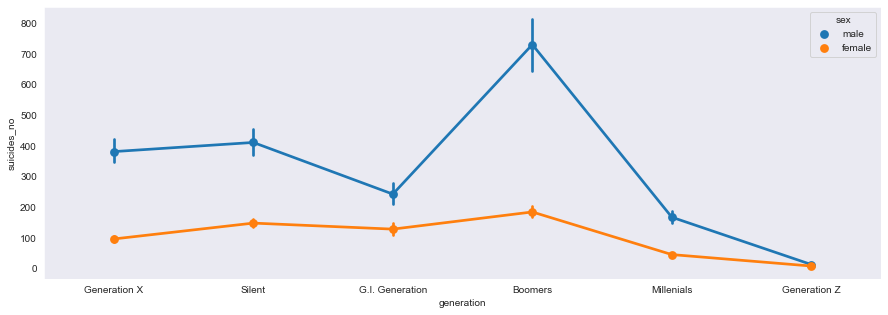

In [102]:
plt.figure(figsize=(15,5))
sns.pointplot(x='generation', y ='suicides_no', hue = 'sex', data = data)
plt.show()

#### Distribution of population across each generation - Violin Plot

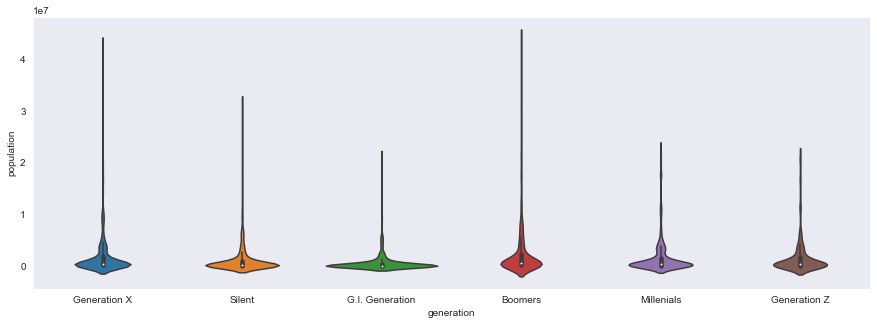

In [103]:
plt.figure(figsize=(15,5))
sns.violinplot(x='generation', y ='population', data = data)
plt.show()

#### Checking trends with temporal data

#### Checking data using trend plot (1985-2015) suicides rate Vs Years

<AxesSubplot:xlabel='year'>

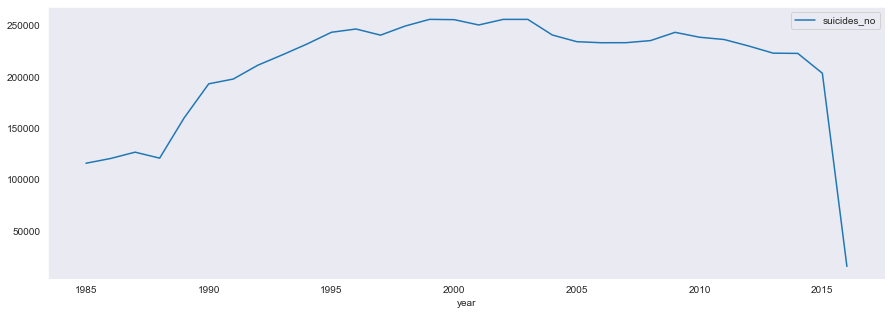

In [104]:
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

#### Checking data using trend plot (1985-2015) population Vs Years

<AxesSubplot:xlabel='year'>

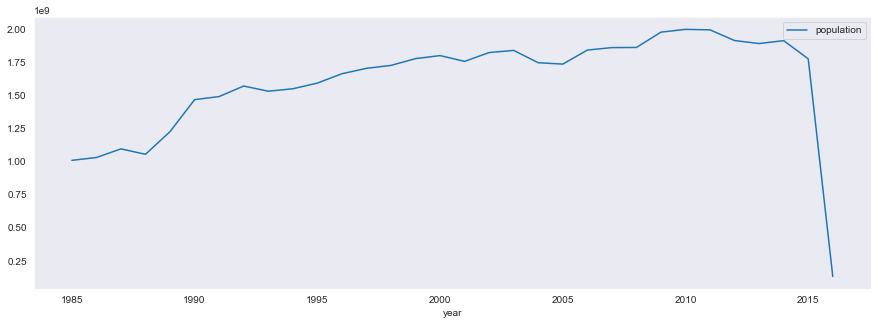

In [105]:
data[['year','population']].groupby(['year']).sum().plot(figsize=(15,5))

#### Checking data using trend plot (1985-2015) suicides/100k pop Vs Years

<AxesSubplot:xlabel='year'>

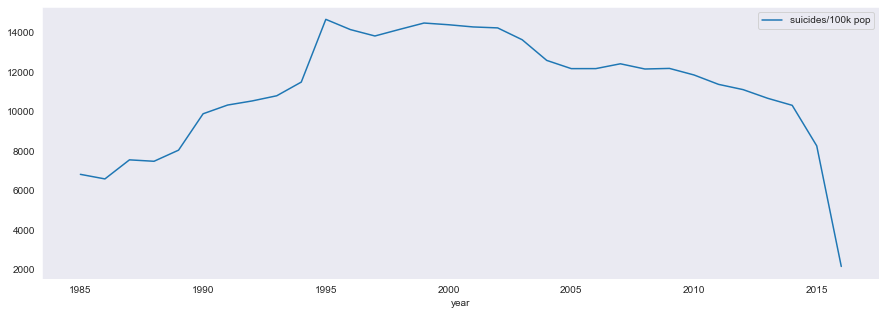

In [106]:
data[['year','suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))